In [1]:
!pip install cassandra-driver pandas matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 521.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 13.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 15.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 15.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [34]:
from cassandra.cluster import Cluster

cluster = Cluster(["cassandra"])   # container name, not localhost
session = cluster.connect("spark_streams")

print("Connected to Cassandra")


Connected to Cassandra


In [51]:
rows = session.execute("DESCRIBE TABLES")
list(rows)

[Row(keyspace_name='spark_streams', type='table', name='created_users')]

In [55]:
table_name = "created_users" 
columns = session.execute(f"DESCRIBE TABLE {table_name}")
for r in columns:
    print(r)


Row(keyspace_name='spark_streams', type='table', name='created_users', create_statement="CREATE TABLE spark_streams.created_users (\n    id uuid PRIMARY KEY,\n    address text,\n    email text,\n    first_name text,\n    gender text,\n    last_name text,\n    phone text,\n    picture text,\n    post_code text,\n    registered_date text,\n    username text\n) WITH additional_write_policy = '99p'\n    AND allow_auto_snapshot = true\n    AND bloom_filter_fp_chance = 0.01\n    AND caching = {'keys': 'ALL', 'rows_per_partition': 'NONE'}\n    AND cdc = false\n    AND comment = ''\n    AND compaction = {'class': 'org.apache.cassandra.db.compaction.SizeTieredCompactionStrategy', 'max_threshold': '32', 'min_threshold': '4'}\n    AND compression = {'chunk_length_in_kb': '16', 'class': 'org.apache.cassandra.io.compress.LZ4Compressor'}\n    AND memtable = 'default'\n    AND crc_check_chance = 1.0\n    AND default_time_to_live = 600\n    AND extensions = {}\n    AND gc_grace_seconds = 864000\n    A

In [77]:
query = """
SELECT *
FROM created_users
"""
rows = session.execute(query)

import pandas as pd
df = pd.DataFrame(rows)

df.head(10)


,id,address,email,first_name,gender,last_name,phone,picture,post_code,registered_date,username
0,0542f32a-88c3-47df-8eed-d50a7510def9,"826 دستغیب, بیرجند, سمنان, Iran",ln.mwswy@example.com,النا,female,موسوی,050-60398774,https://randomuser.me/api/portraits/med/women/...,32840,2020-08-15T11:32:28.478Z,happydog154
1,d803fc6e-30fe-4dc6-9e92-56f19ca66abf,"6233 Dr. Hein Hoeben Laan, Opsterland, Noord-B...",mirjam.folkerts@example.com,Mirjam,female,Folkerts,(0467) 022161,https://randomuser.me/api/portraits/med/women/...,2191 MV,2018-04-12T22:07:36.745Z,brownduck174
2,f65454f0-ccd8-4f77-bee3-70c7af74f13d,"9543 Balovačka, Krupanj, Kolubara, Serbia",milutin.ciric@example.com,Milutin,male,Ćirić,018-2140-704,https://randomuser.me/api/portraits/med/men/84...,45993,2018-07-22T10:44:24.517Z,bigmeercat986
3,41c7ab34-c953-4879-887a-cb8be6e9630d,"1316 Rotuaari, Sauvo, Northern Ostrobothnia, F...",samu.harju@example.com,Samu,male,Harju,07-727-369,https://randomuser.me/api/portraits/med/men/77...,19292,2019-11-14T06:46:38.963Z,tinyfish344
4,de5ade13-efd8-498d-9e83-4bfea6752167,"2501 Rue de la Charité, Perly-Certoux, Vaud, S...",melanie.joly@example.com,Melanie,female,Joly,075 515 34 92,https://randomuser.me/api/portraits/med/women/...,8625,2006-03-11T22:23:02.143Z,orangeladybug594
5,430ed8e2-85bd-4a1b-952c-8e638944196f,"7822 West Coast Road, Dunedin, Wellington, New...",charlotte.kumar@example.com,Charlotte,female,Kumar,(097)-514-8616,https://randomuser.me/api/portraits/med/women/...,33378,2006-08-30T15:02:03.572Z,whitebear657
6,cac7782c-50f6-4261-b37c-b19bd7f2d709,"4604 Bhootnath Rd, Ambattur, Goa, India",abhimanyu.dawangave@example.com,Abhimanyu,male,Dawangave,8786898907,https://randomuser.me/api/portraits/med/men/75...,52953,2021-12-09T13:09:51.569Z,happykoala351
7,c35dac1a-9f98-4397-9936-691d9c027e23,"3942 Calle Mota, Valladolid, Cantabria, Spain",sandra.hidalgo@example.com,Sandra,female,Hidalgo,999-971-770,https://randomuser.me/api/portraits/med/women/...,68143,2007-09-30T05:11:37.017Z,lazytiger219
8,da2ebafe-b2a3-4c2c-a115-42d5c26c6cd8,"7540 Chimanlal Girdharlal Rd, Firozabad, Punja...",tejaswi.das@example.com,Tejaswi,female,Das,9551887511,https://randomuser.me/api/portraits/med/women/...,66641,2013-01-13T10:46:46.706Z,tinybird479
9,bb949e76-5652-48cb-8fa7-2383a8526a4d,"1438 Disputed Rd, Oakville, Saskatchewan, Canada",ryan.lavigne@example.com,Ryan,male,Lavigne,A66 E21-1687,https://randomuser.me/api/portraits/med/men/51...,O8X 1B2,2006-03-29T22:54:02.680Z,yellowtiger515


In [78]:
df['registered_date'] = pd.to_datetime(df['registered_date'])
df.head(500)



,id,address,email,first_name,gender,last_name,phone,picture,post_code,registered_date,username
0,0542f32a-88c3-47df-8eed-d50a7510def9,"826 دستغیب, بیرجند, سمنان, Iran",ln.mwswy@example.com,النا,female,موسوی,050-60398774,https://randomuser.me/api/portraits/med/women/...,32840,2020-08-15 11:32:28.478000+00:00,happydog154
1,d803fc6e-30fe-4dc6-9e92-56f19ca66abf,"6233 Dr. Hein Hoeben Laan, Opsterland, Noord-B...",mirjam.folkerts@example.com,Mirjam,female,Folkerts,(0467) 022161,https://randomuser.me/api/portraits/med/women/...,2191 MV,2018-04-12 22:07:36.745000+00:00,brownduck174
2,f65454f0-ccd8-4f77-bee3-70c7af74f13d,"9543 Balovačka, Krupanj, Kolubara, Serbia",milutin.ciric@example.com,Milutin,male,Ćirić,018-2140-704,https://randomuser.me/api/portraits/med/men/84...,45993,2018-07-22 10:44:24.517000+00:00,bigmeercat986
3,41c7ab34-c953-4879-887a-cb8be6e9630d,"1316 Rotuaari, Sauvo, Northern Ostrobothnia, F...",samu.harju@example.com,Samu,male,Harju,07-727-369,https://randomuser.me/api/portraits/med/men/77...,19292,2019-11-14 06:46:38.963000+00:00,tinyfish344
4,de5ade13-efd8-498d-9e83-4bfea6752167,"2501 Rue de la Charité, Perly-Certoux, Vaud, S...",melanie.joly@example.com,Melanie,female,Joly,075 515 34 92,https://randomuser.me/api/portraits/med/women/...,8625,2006-03-11 22:23:02.143000+00:00,orangeladybug594
...,...,...,...,...,...,...,...,...,...,...,...
385,36f852f2-d96b-422c-a4aa-4a4bff974ab3,"3578 Rue des Jardins, Versailles, Allier, France",sohan.fontai@example.com,Sohan,male,Fontai,01-91-71-18-80,https://randomuser.me/api/portraits/med/men/60...,68135,2011-05-19 09:50:19.143000+00:00,bigcat778
386,5b7c0e42-b399-42dc-a11b-60829eaf9edb,"4742 پارک ولیعصر, بیرجند, اصفهان, Iran",arsyn.zraay@example.com,آرسین,male,زارعی,080-18479983,https://randomuser.me/api/portraits/med/men/41...,53475,2005-07-28 20:47:43.741000+00:00,organicbutterfly387
387,240e46de-b56f-44d6-a43e-cf2fd97794f2,"6241 Crockett St, Huntsville, New York, United...",alyssa.butler@example.com,Alyssa,female,Butler,(722) 310-3776,https://randomuser.me/api/portraits/med/women/...,61407,2016-01-23 08:17:19.412000+00:00,organicgorilla948
388,ce8ff46a-721a-44ab-a217-326df6837342,"774 Retorno Urbina, Ciudad Benito Juárez, Sono...",gael.ballesteros@example.com,Gael,male,Ballesteros,(620) 629 1997,https://randomuser.me/api/portraits/med/men/0.jpg,66034,2010-05-27 17:23:57.437000+00:00,organicgorilla881


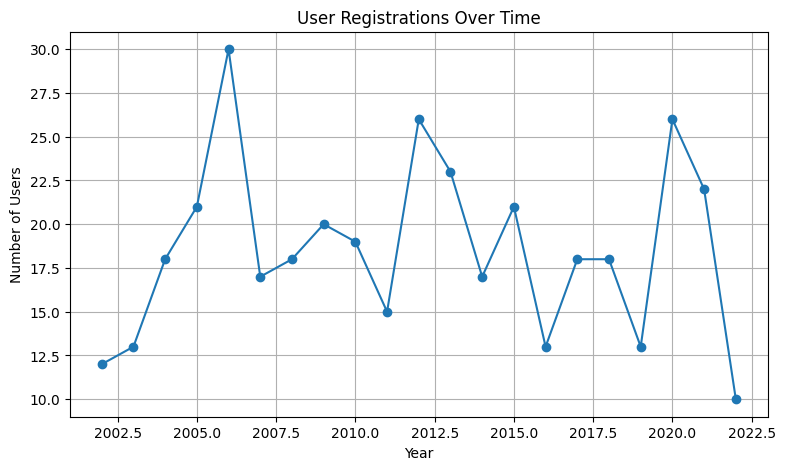

In [79]:
registrations_by_year = (
    df['registered_date']
    .dt.year
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(9,5))
plt.plot(registrations_by_year.index, registrations_by_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.title("User Registrations Over Time")
plt.grid(True)
plt.show()


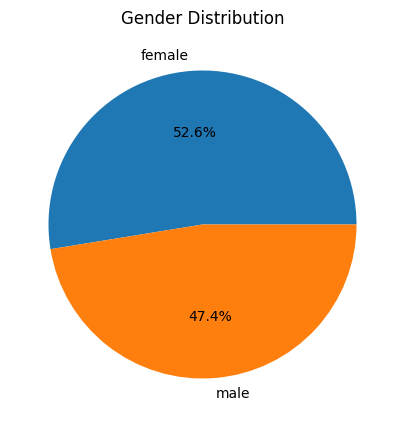

In [80]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()


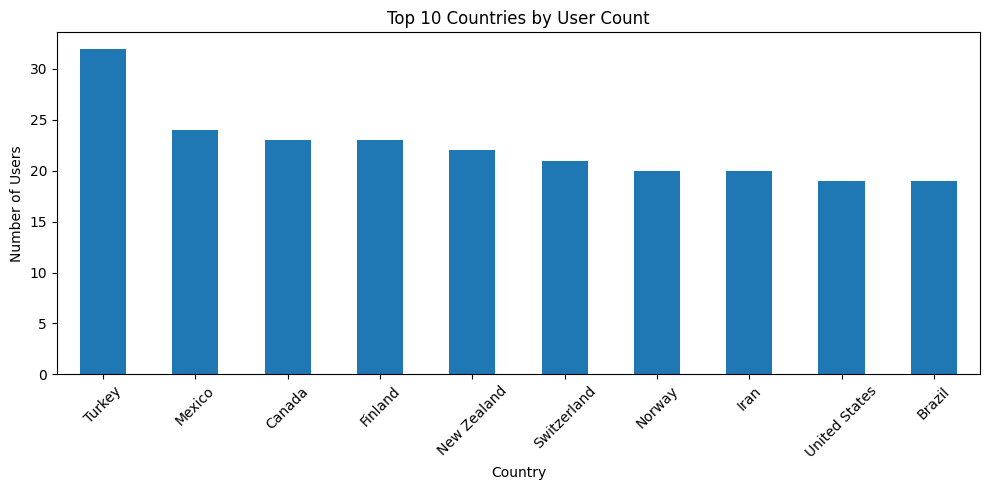

In [81]:
df['country'] = df['address'].str.split(',').str[-1].str.strip()
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.title("Top 10 Countries by User Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



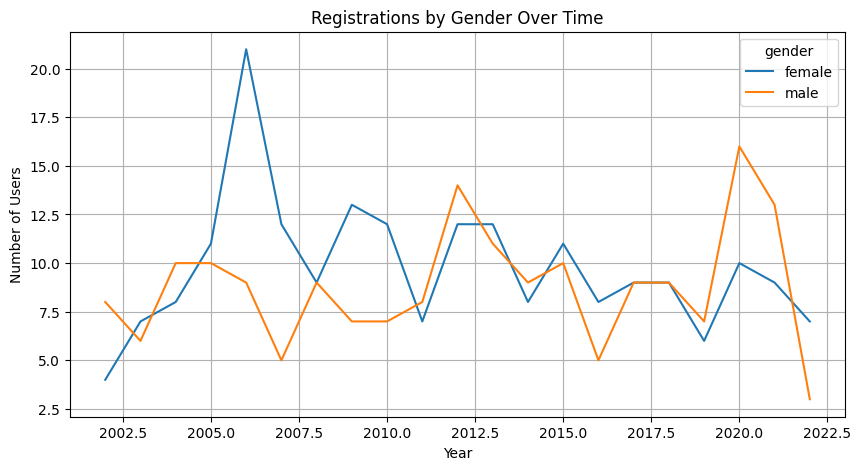

In [82]:
df['year'] = df['registered_date'].dt.year
gender_year = df.groupby(['year', 'gender']).size().unstack()

gender_year.plot(kind='line', figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.title("Registrations by Gender Over Time")
plt.grid(True)
plt.show()
